In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer

# Preprocession the Dataset

In [4]:
df=pd.read_csv('../input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Fare'].to_xarray()

<xarray.DataArray 'Fare' (index: 891)>
array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
         8.05  ,  31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,
        18.    ,   7.225 ,  26.    ,  13.    ,   8.0292,  35.5   ,
        21.075 ,  31.3875,   7.225 , 263.    ,   7.8792,   7.8958,
        27.7208, 146.5208,   7.75  ,  10.5   ,  82.1708,  52.    ,
         7.2292,   8.05  ,  18.    ,  11.2417,   9.475 ,  21.    ,
         7.8958,  41.5792,   7.8792,   8.05  ,  15.5   ,   7.75  ,
        21.6792,  17.8   ,  39.6875,   7.8   ,  76.7292,  26.    ,
        61.9792,  35.5   ,  10.5   ,   7.2292,  27.75  ,  46.9   ,
         7.2292,  80.    ,  83.475 ,  27.9   ,  27.7208,  15.2458,
        10.5   ,   8.1583,   7.925 ,   8.6625,  10.5   ,  46.9   ,
        73.5   ,  14.4542,  56.4958,   7.65  ,   7.8958,   8.05  ,
        29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,  47.1   ,
        10.5   ,  15.85  ,  34.375 ,   8.05  , 263.    ,   8.05  ,
         8.05  ,   7.8542,  61.175 ,  20.575 ,   7.25  ,   8.05  ,
        34.6542,  63.3583,  23.    ,  26.    ,   7.8958,   7.8958,
        77.2875,   8.6542,   7.925 ,   7.8958,   7.65  ,   7.775 ,
         7.8958,  24.15  ,  52.    ,  14.4542,   8.05  ,   9.825 ,
        14.4583,   7.925 ,   7.75  ,  21.    , 247.5208,  31.275 ,
...
        23.    ,   7.75  ,   7.75  ,  12.475 ,   7.7375, 211.3375,
         7.2292,  57.    ,  30.    ,  23.45  ,   7.05  ,   7.25  ,
         7.4958,  29.125 ,  20.575 ,  79.2   ,   7.75  ,  26.    ,
        69.55  ,  30.6958,   7.8958,  13.    ,  25.9292,   8.6833,
         7.2292,  24.15  ,  13.    ,  26.25  , 120.    ,   8.5167,
         6.975 ,   7.775 ,   0.    ,   7.775 ,  13.    ,  53.1   ,
         7.8875,  24.15  ,  10.5   ,  31.275 ,   8.05  ,   0.    ,
         7.925 ,  37.0042,   6.45  ,  27.9   ,  93.5   ,   8.6625,
         0.    ,  12.475 ,  39.6875,   6.95  ,  56.4958,  37.0042,
         7.75  ,  80.    ,  14.4542,  18.75  ,   7.2292,   7.8542,
         8.3   ,  83.1583,   8.6625,   8.05  ,  56.4958,  29.7   ,
         7.925 ,  10.5   ,  31.    ,   6.4375,   8.6625,   7.55  ,
        69.55  ,   7.8958,  33.    ,  89.1042,  31.275 ,   7.775 ,
        15.2458,  39.4   ,  26.    ,   9.35  , 164.8667,  26.55  ,
        19.2583,   7.2292,  14.1083,  11.5   ,  25.9292,  69.55  ,
        13.    ,  13.    ,  13.8583,  50.4958,   9.5   ,  11.1333,
         7.8958,  52.5542,   5.    ,   9.    ,  24.    ,   7.225 ,
         9.8458,   7.8958,   7.8958,  83.1583,  26.    ,   7.8958,
        10.5167,  10.5   ,   7.05  ,  29.125 ,  13.    ,  30.    ,
        23.45  ,  30.    ,   7.75  ])
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 7 8 ... 883 884 885 886 887 888 889 890

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.isnull().mean()*100  # we will drop cabin column as it contains alot of M.values

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<AxesSubplot:>

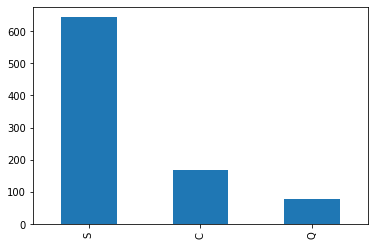

In [8]:
df['Embarked'].value_counts().plot(kind='bar')

In [9]:
df['Embarked'].mode()

0    S
dtype: object

In [10]:
df['Embarked'].fillna('S', inplace=True)

In [11]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64

In [13]:
df.drop(columns=['Cabin'],inplace=True)

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [15]:
df.isnull().mean()*100

PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Name            0.00000
Sex             0.00000
Age            19.86532
SibSp           0.00000
Parch           0.00000
Ticket          0.00000
Fare            0.00000
Embarked        0.00000
dtype: float64

In [16]:
df.drop(columns=['Name','Sex','Ticket'],inplace=True)

In [17]:
df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,22.0,1,0,7.2500,S
1,2,1,1,38.0,1,0,71.2833,C


In [18]:
mean_age=df['Age'].mean()

In [19]:
df['Age_t']=df['Age'].fillna(mean_age)

In [20]:
df.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Age_t
0,1,0,3,22.0,1,0,7.2500,S,22.0
1,2,1,1,38.0,1,0,71.2833,C,38.0
2,3,1,3,26.0,0,0,7.9250,S,26.0


In [21]:
print(df['Age'].var())
print(df['Age_t'].isnull().mean())

211.01912474630802
0.0


In [22]:
df.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Age_t
0,1,0,3,22.0,1,0,7.2500,S,22.0
1,2,1,1,38.0,1,0,71.2833,C,38.0
2,3,1,3,26.0,0,0,7.9250,S,26.0


In [23]:
df.drop(columns=['Age'], inplace=True)

In [24]:
df.head(2)

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,Age_t
0,1,0,3,1,0,7.2500,S,22.0
1,2,1,1,1,0,71.2833,C,38.0


In [25]:
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

In [26]:
df.head(2)

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,Age_t,Family_size
0,1,0,3,1,0,7.2500,S,22.0,2
1,2,1,1,1,0,71.2833,C,38.0,2


In [27]:
# Looking for some duplicated values
df.columns.duplicated().sum()

0

# Feature Engineering

In [28]:
def myfunc(num):
    if num == 1:
        #alone
        return 0
    elif num >1 and num <=4:
        # small family
        return 1
    else:
        # large family
        return 2


In [29]:
df['Family_type'] = df['Family_size'].apply(myfunc)

In [30]:
df.head(2)

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,Age_t,Family_size,Family_type
0,1,0,3,1,0,7.2500,S,22.0,2,1
1,2,1,1,1,0,71.2833,C,38.0,2,1


In [31]:
df.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

In [32]:
df.head(2)

,PassengerId,Survived,Pclass,Fare,Embarked,Age_t,Family_type
0,1,0,3,7.2500,S,22.0,1
1,2,1,1,71.2833,C,38.0,1


In [33]:
df.drop(columns=['Embarked'],inplace=True)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Fare,Age_t,Family_type
0,1,0,3,7.2500,22.0,1
1,2,1,1,71.2833,38.0,1
2,3,1,3,7.9250,26.0,0
3,4,1,1,53.1000,35.0,1
4,5,0,3,8.0500,35.0,0


In [35]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Fare           float64
Age_t          float64
Family_type      int64
dtype: object

In [37]:
df.drop(columns='PassengerId',inplace=True)

In [38]:
df.head(2)

,Survived,Pclass,Fare,Age_t,Family_type
0,0,3,7.2500,22.0,1
1,1,1,71.2833,38.0,1


# Feature Transformation

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fare QQ Plot')

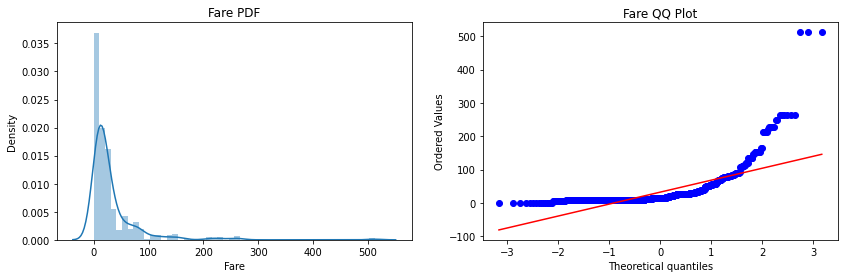

In [39]:
# Observing the distribution pattern
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(df['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


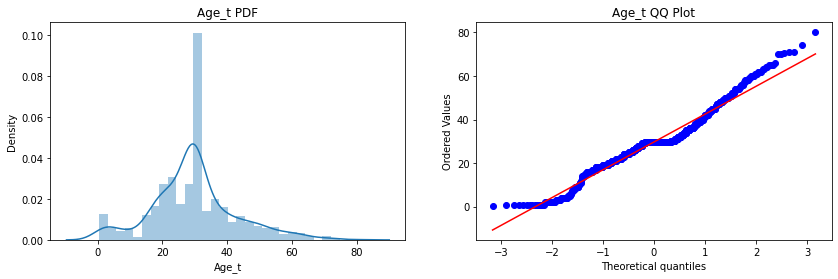

In [40]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Age_t'])
plt.title('Age_t PDF')

plt.subplot(122)
stats.probplot(df['Age_t'], dist="norm", plot=plt)
plt.title('Age_t QQ Plot')

plt.show()

<AxesSubplot:>

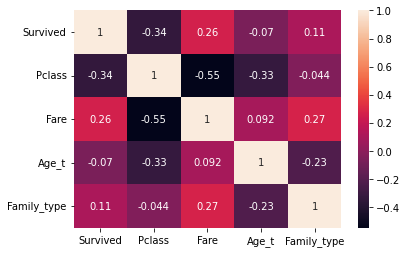

In [41]:
sns.heatmap(df.corr(),annot=True)

# Emsemble Modeling (Stacking)

In [42]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
trf = FunctionTransformer(func=np.log1p)

In [45]:
X_train_t = trf.fit_transform(X_train)
X_test_t = trf.transform(X_test)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


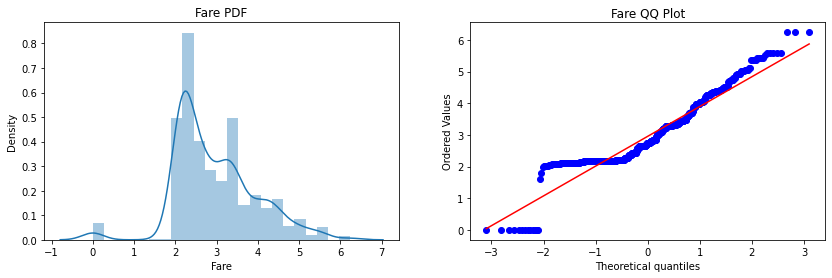

In [46]:
# After log transformation, distribution now is near to normal distribution in Fare column
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train_t['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train_t['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [47]:
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import RidgeClassifier

In [48]:
estimators = [
    ('rbc', RandomForestClassifier(n_estimators=800,criterion='entropy',max_samples=1,max_depth=5)),
    ('cbc', LogisticRegression()),
    ('gbdt',GradientBoostingClassifier(n_estimators=500))
]

In [49]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=CatBoostClassifier()
)
clf.fit(X_train_t, y_train)

Learning rate set to 0.008911
0:	learn: 0.6905941	total: 53.1ms	remaining: 53s
1:	learn: 0.6883767	total: 54ms	remaining: 27s
2:	learn: 0.6855578	total: 54.8ms	remaining: 18.2s
3:	learn: 0.6830565	total: 55.7ms	remaining: 13.9s
4:	learn: 0.6806217	total: 56.5ms	remaining: 11.2s
5:	learn: 0.6786844	total: 57.1ms	remaining: 9.46s
6:	learn: 0.6761615	total: 58ms	remaining: 8.22s
7:	learn: 0.6737600	total: 58.8ms	remaining: 7.29s
8:	learn: 0.6715068	total: 59.6ms	remaining: 6.57s
9:	learn: 0.6693373	total: 60.5ms	remaining: 5.99s
10:	learn: 0.6672293	total: 61.4ms	remaining: 5.52s
11:	learn: 0.6651141	total: 62.3ms	remaining: 5.13s
12:	learn: 0.6628611	total: 63.1ms	remaining: 4.79s
13:	learn: 0.6609570	total: 63.9ms	remaining: 4.5s
14:	learn: 0.6589857	total: 64.7ms	remaining: 4.25s
15:	learn: 0.6568572	total: 65.5ms	remaining: 4.03s
16:	learn: 0.6548089	total: 66.4ms	remaining: 3.84s
17:	learn: 0.6528441	total: 67.1ms	remaining: 3.66s
18:	learn: 0.6510819	total: 67.9ms	remaining: 3.51s
1

StackingClassifier(estimators=[('rbc',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=5,
                                                       max_samples=1,
                                                       n_estimators=800)),
                               ('cbc', LogisticRegression()),
                               ('gbdt',
                                GradientBoostingClassifier(n_estimators=500))],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x7f36ee88ea90>)

In [50]:
y_pred = clf.predict(X_test_t)

In [51]:
accuracy_score(y_test,y_pred)

0.7486033519553073

In [53]:
np.mean(cross_val_score(clf, X ,y, scoring='accuracy',cv=2))

Learning rate set to 0.007291
0:	learn: 0.6901095	total: 703us	remaining: 703ms
1:	learn: 0.6869467	total: 1.3ms	remaining: 651ms
2:	learn: 0.6839064	total: 2.08ms	remaining: 691ms
3:	learn: 0.6811527	total: 2.69ms	remaining: 670ms
4:	learn: 0.6788002	total: 3.26ms	remaining: 648ms
5:	learn: 0.6762347	total: 4.02ms	remaining: 666ms
6:	learn: 0.6733053	total: 4.86ms	remaining: 690ms
7:	learn: 0.6706262	total: 5.67ms	remaining: 704ms
8:	learn: 0.6678131	total: 6.42ms	remaining: 707ms
9:	learn: 0.6654651	total: 7.26ms	remaining: 719ms
10:	learn: 0.6627594	total: 8.06ms	remaining: 724ms
11:	learn: 0.6602905	total: 8.83ms	remaining: 727ms
12:	learn: 0.6575599	total: 9.65ms	remaining: 733ms
13:	learn: 0.6551782	total: 10.4ms	remaining: 735ms
14:	learn: 0.6527801	total: 11.3ms	remaining: 739ms
15:	learn: 0.6502177	total: 12.2ms	remaining: 749ms
16:	learn: 0.6475145	total: 12.8ms	remaining: 740ms
17:	learn: 0.6450174	total: 13.4ms	remaining: 729ms
18:	learn: 0.6424583	total: 13.9ms	remaining: 

0.6924900488738852

In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.72      0.81       138
           1       0.47      0.85      0.61        41

    accuracy                           0.75       179
   macro avg       0.71      0.79      0.71       179
weighted avg       0.84      0.75      0.77       179



In [55]:
confusion_matrix(y_pred,y_test)

array([[99, 39],
       [ 6, 35]])